# MERGING WITH PANDAS

Pandas ile farklı dataframe'lerde bulunan verileri, aynı dataframe'de toplamayı (birleştirmeyi) öğreneceğiz. Öğreneceğimiz bu birleştirme işlemine **merging** denir. **Merging (birleştirme)**'nin farklı yöntemleri vardır. **Inner join, Left join, Right join, Cross joinn, Self join**.. gibi. 

Giriş yapmadan önce, kullanacağımız bütün dataframe'leri içe aktaralım.

In [1]:
import pandas as pd 

actors_movies = pd.read_csv("actors_movies.csv")
WorldBank_POP = pd.read_csv("WorldBank_POP.csv")
WorldBank_GDP = pd.read_csv("WorldBank_GDP.csv")
S_P500 = pd.read_csv("S&P500.csv")
business_owners = pd.read_pickle("business_owners.p")
census = pd.read_pickle("census.p")
land_use = pd.read_pickle("land_use.p")
licenses = pd.read_pickle("licenses.p")
taxi_owners = pd.read_pickle("taxi_owners.p")
taxi_vehicles = pd.read_pickle("taxi_vehicles.p")
ward = pd.read_pickle("ward.p")
zip_demo = pd.read_pickle("zip_demo.p")
taglines = pd.read_pickle("taglines.p")
financials = pd.read_pickle("financials.p")
sequels = pd.read_pickle("sequels.p")
movie_to_genres = pd.read_pickle("movie_to_genres.p")
crews = pd.read_pickle("crews.p")
casts = pd.read_pickle("casts.p")
ratings = pd.read_pickle("ratings.p")
movies = pd.read_pickle("movies.p")
stations = pd.read_pickle("stations.p")
cta_calendar = pd.read_pickle("cta_calendar.p")
cta_ridership = pd.read_pickle("cta_ridership.p")

Python'da birleştirme yapmak için **xx.merge()** işlevini kullanırız. 

Tutoiral Linki = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [2]:
def ayrac():
    """Kod bloklarını birbirinden ayırdığımızı gösteren ayraç"""
    print("\n*****\n")

## Inner Join (İç Birleştirme)

**Inner Join (İç Birleştirme) Çalışma Şekli :**

 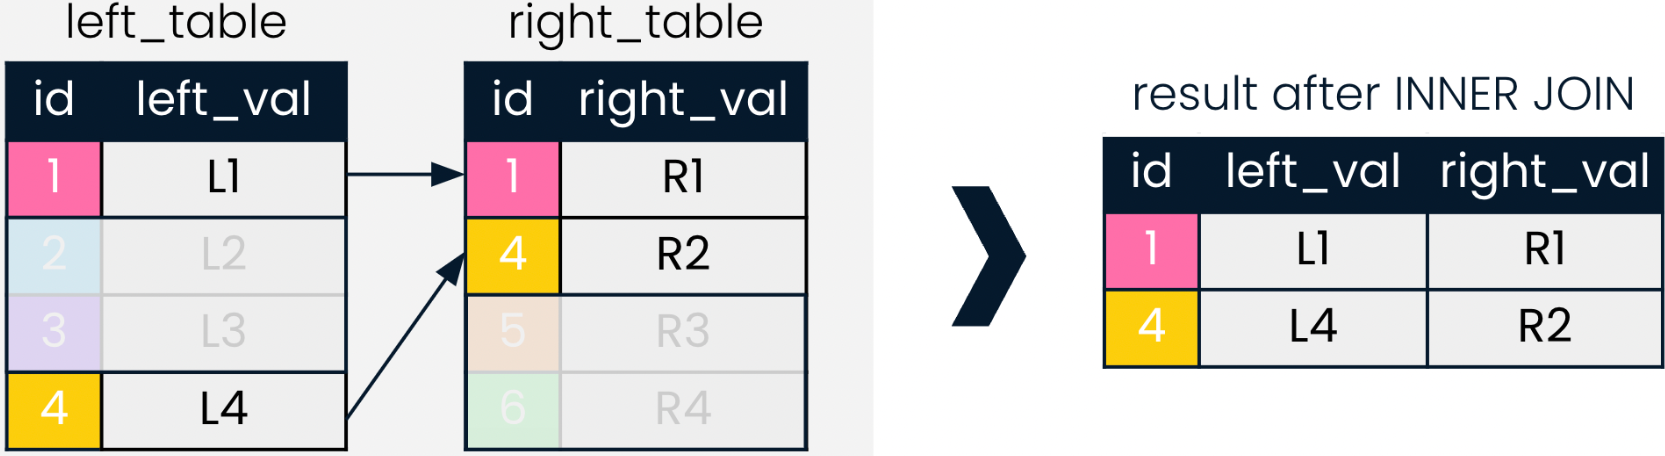
 
 Left table ve right table olarak 2 tane dataframe'imiz olduğunu varsayalım. Inner join, bu iki tablodan **sadece eşleşen satırları** içeren ve **eşleşen sütunlar** üzerinden yeni bir table (dataframe) oluşturur. 

Aşağıdaki kod bloğunda, taxi_owners ve taxi_vehicles dataframe'lerini **xx.merge** kullanarak inner join olarak birleştirelim. **xx.merge** işlevinde birleştirme şekli, default olarak *inner'dır*.

In [3]:
print(taxi_owners.head(3))
print("taxi_owners dataframe'inin satır ve sütun sayısı =", taxi_owners.shape)

ayrac()

print(taxi_vehicles.head(3))
print("taxi_vehicles dataframe'inin satır ve sütun sayısı =", taxi_vehicles.shape)

ayrac()

taxi_own_veh = taxi_owners.merge(taxi_vehicles, on = "vid", suffixes = ("_own", "_veh"))
print(taxi_own_veh.head(3))
ayrac()
print(taxi_own_veh["fuel_type"].value_counts())

     rid   vid           owner                 address    zip
0  T6285  6285  AGEAN TAXI LLC     4536 N. ELSTON AVE.  60630
1  T4862  4862    MANGIB CORP.  5717 N. WASHTENAW AVE.  60659
2  T1495  1495   FUNRIDE, INC.     3351 W. ADDISON ST.  60618
taxi_owners dataframe'inin satır ve sütun sayısı = (3519, 5)

*****

    vid    make   model  year fuel_type           owner
0  2767  TOYOTA   CAMRY  2013    HYBRID  SEYED M. BADRI
1  1411  TOYOTA    RAV4  2017    HYBRID     DESZY CORP.
2  6500  NISSAN  SENTRA  2019  GASOLINE  AGAPH CAB CORP
taxi_vehicles dataframe'inin satır ve sütun sayısı = (3519, 6)

*****

     rid   vid       owner_own                 address    zip    make   model  \
0  T6285  6285  AGEAN TAXI LLC     4536 N. ELSTON AVE.  60630  NISSAN  ALTIMA   
1  T4862  4862    MANGIB CORP.  5717 N. WASHTENAW AVE.  60659   HONDA     CRV   
2  T1495  1495   FUNRIDE, INC.     3351 W. ADDISON ST.  60618  TOYOTA  SIENNA   

   year fuel_type       owner_veh  
0  2011    HYBRID  AGEAN TA

+ **xx.merge()** işlevinin **on** parametresi, dataframe'lerin hangi sütunlar üzerinden birleştirileceğinin argümanını alır.

+ **xx.merge()** işlevinin **suffixes** parametresi, iki dataframe'de de aynı isme sahip olan sütunları ayırt etmemiz için bir belirteç eklememizi sağlar.

+ **taxi_own_veh["fuel_type"].value_counts()**, fuel_type sütunundaki benzersiz değerlerden kaç tane olduğunu döndürdü.

## Defining Relationships (İlişkileri Tanımlama)

Veriler arasındaki ilişiki türlerini öğreneceğiz.

### < One-to-One (Bire Bir İlişki) >

Left table ve right table olarak iki tablomuz olduğunu varsayalım. Bire bir ilişkide, left table'daki her satır, right table'daki yalnızca bir satırla ilişkilidir. Yani öğeler arasında benzersiz bir ilişiki mevcuttur. Bu yüzden diğer ilişkilere nazaran daha az yaygındır. Örnek olarak; iki parmak izinin aynı olmaması verilebilir. Inner join başlığı altında yaptığımız birleştirmeler de one-to-one ilişkiye sahip birleştirmelerdir.

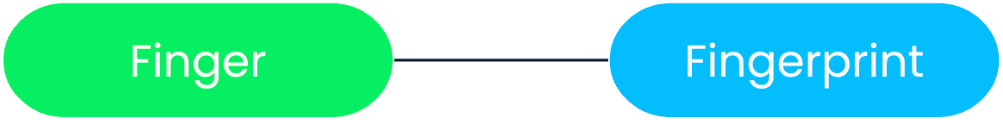

### < One-to-Many (Birden Çok İlişki) > 

Left table ve right table olarak iki tablomuz olduğunu varsayalım. Birden çok ilişkide, left table'daki her satır, right table'daki bir veya daha fazla satırla ilişkilidir. Örnek olarak; bir sanatçı ve kitapları, bir şarkıcı ve müzikleri, bir yönetmen ve filmleri gibi birden çok ilişkili durumlar verilebilir.

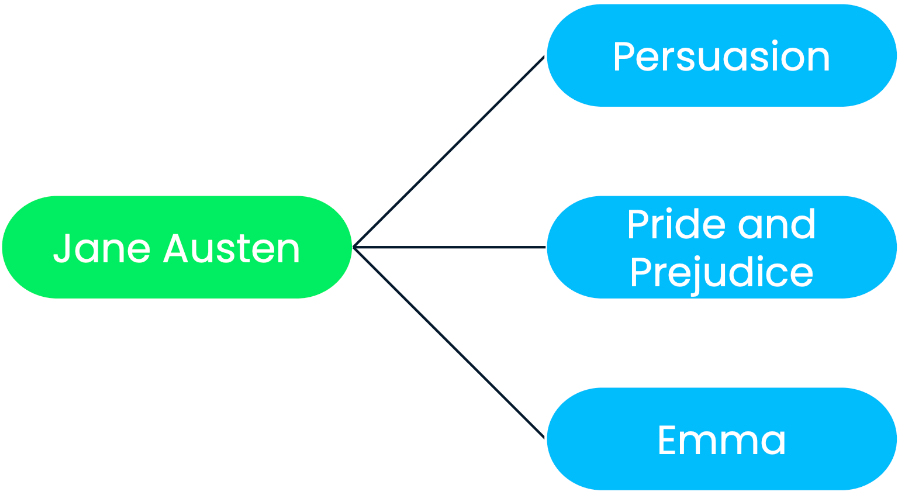

Bir işletmenin bir veya daha fazla sahibi olabilir. Bu yüzden aşağıdaki kod bloğunda, business_owners ve licenses dataframe'lerini birleştireceğiz. Birden çok ilişkide, sol tablodaki bir satır, sağ tablodaki birden çok satırla ilişkiliyse tekrarlanabilir. En yaygın işletme sahibi unvanının ne olduğunu göreceğiz. (yani sekreter, CEO veya başkan yardımcısı)   

In [4]:
print(business_owners.head(3))
print("business_owners dataframe'indeki satır ve sütun sayısı =", business_owners.shape)

ayrac()

print(licenses.head(3))
print("licenses dataframe'indeki satır ve sütın sayısı =", licenses.shape)

ayrac()

#licenses ve business_owners dataframe'lerini birleştirelim
licenses_owners = licenses.merge(business_owners, on = "account")
print(licenses_owners.head(3))
ayrac()
print("licenses_owners dataframe'indeki satır ve sütun sayısı =", licenses_owners.shape)

ayrac()

#İşletme unvanlarını gruplandıralım 
counted_df = licenses_owners.groupby("title").agg({"account" : "count"})
print(counted_df)

ayrac()

#İşletme unvanlarınının sayısını büyükten küçüğe sıralanmış bir şekilde yazdıralım
sorted_df = counted_df.sort_values(by='account', ascending=False)
print(sorted_df)

  account first_name last_name      title
0      10      PEARL   SHERMAN  PRESIDENT
1      10      PEARL   SHERMAN  SECRETARY
2   10002     WALTER    MROZEK    PARTNER
business_owners dataframe'indeki satır ve sütun sayısı = (21352, 4)

*****

  account ward  aid              business              address    zip
0  307071    3  743  REGGIE'S BAR & GRILL      2105 S STATE ST  60616
1      10   10  829            HONEYBEERS  13200 S HOUSTON AVE  60633
2   10002   14  775           CELINA DELI    5089 S ARCHER AVE  60632
licenses dataframe'indeki satır ve sütın sayısı = (10000, 6)

*****

  account ward  aid              business              address    zip  \
0  307071    3  743  REGGIE'S BAR & GRILL      2105 S STATE ST  60616   
1      10   10  829            HONEYBEERS  13200 S HOUSTON AVE  60633   
2      10   10  829            HONEYBEERS  13200 S HOUSTON AVE  60633   

  first_name last_name      title  
0     ROBERT     GLICK     MEMBER  
1      PEARL   SHERMAN  PRESIDENT  
2     

## Merging Multiple DataFrames (Birden Çok DataFrame'i Birleştirme)

Bazı durumlarda ihtiyacımız olan veriler, 2'den fazla ve farklı dataframe'lerde bulunabilir. Bu durumda, bu dataframe'leri birleştirmemiz gerekir. 

Aşağıdaki kod bloğunda, işletmelerin bulunduğu mahalleler hakkındaki demografik bilgilere bakacağız. Licenses, ward ve zip_demo tablolarını birleştireceğiz.

In [5]:
licenses_zip_ward = licenses.merge(zip_demo, on='zip') \
            			.merge(ward, on='ward')

print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

                             income
alderman                           
Ameya Pawar                 66246.0
Anthony A. Beale            38206.0
Anthony V. Napolitano       82226.0
Ariel E. Reyboras           41307.0
Brendan Reilly             110215.0
Brian Hopkins               87143.0
Carlos Ramirez-Rosa         66246.0
Carrie M. Austin            38206.0
Chris Taliaferro            55566.0
Daniel "Danny" Solis        41226.0
David H. Moore              33304.0
Deborah Mell                66246.0
Debra L. Silverstein        50554.0
Derrick G. Curtis           65770.0
Edward M. Burke             42335.0
Emma M. Mitts               36283.0
George Cardenas             33959.0
Gilbert Villegas            41307.0
Gregory I. Mitchell         24941.0
Harry Osterman              45442.0
Howard B. Brookins, Jr.     33304.0
James Cappleman             79565.0
Jason C. Ervin              41226.0
Joe Moore                   39163.0
John S. Arena               70122.0
Leslie A. Hairston          

+ **agg({'income' : 'median'})**, income sütununa median işlemini uygular. 

## Left Join (Sol Birleştirme)

**Left Join (Sol Birleştirme) Çalışma Şekli :**

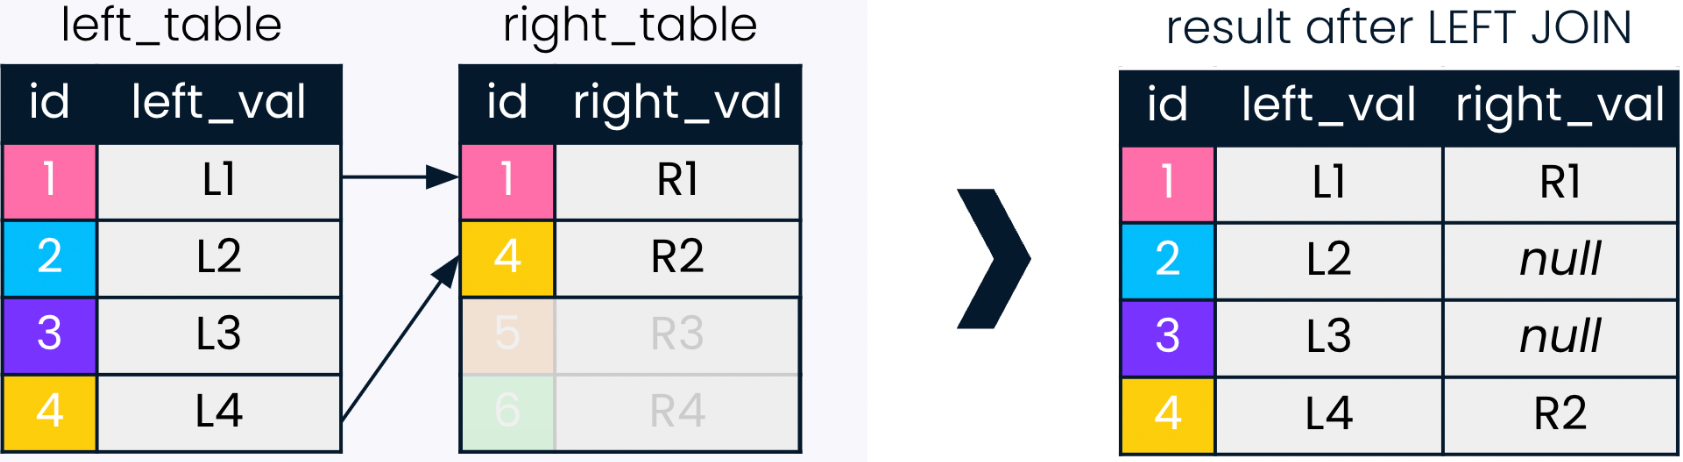

Left table ve right table olmak üzere 2 adet tablomuz olduğunu varsayalım. Left join; bu iki tabloda eşleşen satırları ve left table'daki eşleşmeyen satırları alarak, eşleşen sütunlar üzerinden yeni bir tablo oluşturur. 

Aşağıdaki kod bloğunda, movies dataframe'i ile tagline dataframe'ini Left join ile birleştirelim. 

In [6]:
print(movies.head(3))
print("movies dataframe'inin satır ve sütun sayısı =", movies.shape)

ayrac()

print(taglines.head(3))
print("taglines dataframe'inin satır ve sütun sayısı =", taglines.shape)

ayrac()

movies_taglines = movies.merge(taglines, on = "id", how = "left")
print(movies_taglines.head(3))
print("movies_taglines dataframe'inin satır ve sütun sayısı =", movies_taglines.shape)

ayrac()

number_of_missing = movies_taglines["tagline"].isnull().sum()
print(number_of_missing)

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
movies dataframe'inin satır ve sütun sayısı = (4803, 4)

*****

       id                                         tagline
0   19995                     Enter the World of Pandora.
1     285  At the end of the world, the adventure begins.
2  206647                           A Plan No One Escapes
taglines dataframe'inin satır ve sütun sayısı = (3955, 2)

*****

      id                 title  popularity release_date  \
0    257          Oliver Twist   20.415572   2005-09-23   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12   
2  38365             Grown Ups   38.864027   2010-06-24   

                                           tagline  
0                                              NaN  
1             Never underestimate an overachiever.  
2  Boys will be bo

+ taglines tablosu 3955 satır içeriyor, movies tablosu ise 4803. tagline tablosu, movies tablosuna nazaran daha az film içeriyor. Bunları left join ile left table = movies, right table = taglines olacak şekilde birleştirdiğimizde, movies tablosunda daha fazla satır olduğundan dolayı eşleşmeyen satırlar oldu. Bu satırlar da **NaN** olarak tabloya dahil edildi. Eğer inner join yapmış olsaydık, bu satırlar dahil edilmeyecekti. 


+ Birleştirmeden sonra ortaya çıkan tablomuz 4805 satıra sahip. Bunun nedeni, movies tablosundaki tüm veri satırlarını döndürüyor olmamızdır.


+ movies ve taglines tabloları arasındaki ilişiki, bire bir ilişikidir.


+ **number_of_missing = movies_taglines["tagline"].isnull().sum()** değişkeni, movies_taglines olarak oluşturduğumuz tablodaki *tagline* sütunundaki NaN değerleri **isnull()** ile belirleri ve **sum()** toplayıp kaç tane olduğunu depoladı.

## Right Join (Sağ Birleştirme)

**Right Join (Sağ Birleştirme) Çalışma Şekli :**

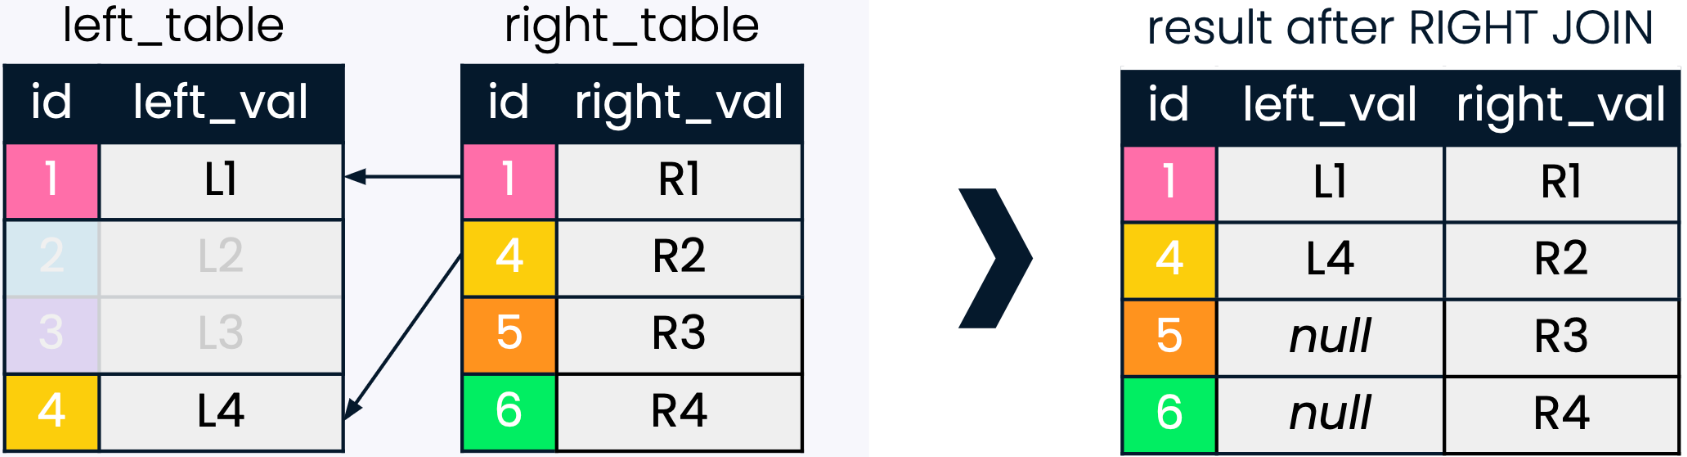

Right join aslında Left join ile aynı mantıktadır. Sadece eşleşmeyen satırları alınan tablo, right table'dır. Aslında bir bakıma Left join'in tersidir.

Aşağıdaki kod bloğunda, movie_to_genres tablosunun **genre == 'TV Movie'** olan satırları ile movies tablosunu right join ile birleştirelim.

In [7]:
print(movie_to_genres.head(3))
print("movie_to_genres dataframe'inin satır ve sütun sayısı =", movie_to_genres.shape)

ayrac()

tv_genres = movie_to_genres[movie_to_genres["genre"] == "TV Movie"]
print(tv_genres)

ayrac()

print(movies.head(3))
print("movies dataframe'inin satır ve sütun sayısı =", movies.shape)

ayrac()

tv_movies = movies.merge(tv_genres, how = "right", left_on = "id", right_on = "movie_id")
print(tv_movies)

   movie_id            genre
0         5            Crime
1         5           Comedy
2        11  Science Fiction
movie_to_genres dataframe'inin satır ve sütun sayısı = (12160, 2)

*****

       movie_id     genre
4998      10947  TV Movie
5994      13187  TV Movie
7443      22488  TV Movie
10061     78814  TV Movie
10790    153397  TV Movie
10835    158150  TV Movie
11096    205321  TV Movie
11282    231617  TV Movie

*****

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
movies dataframe'inin satır ve sütun sayısı = (4803, 4)

*****

       id                      title  popularity release_date  movie_id  \
0   10947        High School Musical   16.536374   2006-01-20     10947   
1   13187  A Charlie Brown Christmas    8.701183   1965-12-09     13187   
2   22488         Love's Abiding Joy    1.128559   2006

+ **left_on = "id", right_on = "movie_id"** parametreleri, birleştirilen tablolardan hangi anahtar sütunların tabloları birleştireceğini belirtmemizi sağlarlar. Dikkat edersek, movies tablosu ile tv_genres tablosunda ortak bir sütun yok. Bu yüzden **sağdan birleştirilen tablo (tv_genres), movie_id sütunundan, soldan birleştirilen tablo (movies), id sütunundan birleştirildi.**

## Outer Join (Dış Birleştirme)

**Outer Join (Dış Birleştirme) Çalışma Şekli :**

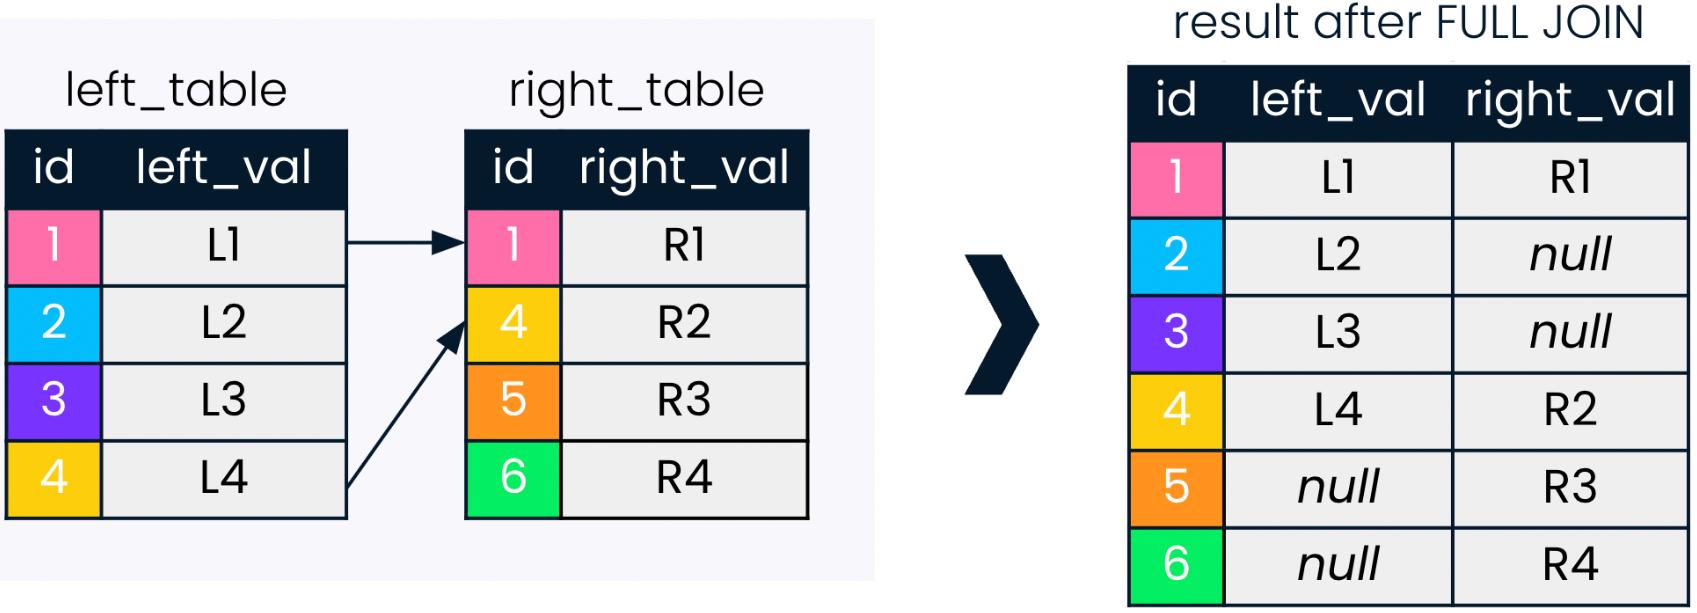

Left table ve Right table olmak üzere 2 tablomuz olduğunu varsayalım. Outer join, eşleşmeyen hiçbir satırı elemeden direkt olarak 2 tablodaki bütün değerleri alarak yeni bir tablo oluşturur.

Aşağıdaki kod bloğunda, movie_to_genres tablosunda, **genre == 'Family'** olan ve **genre == 'Comedy'** olan sütunları ayrı ayrı farklı değişkenlere atayalım ve bu iki tabloyu Outer join ile birleştirelim.  

In [8]:
family = movie_to_genres[movie_to_genres["genre"] == "Family"]
comedy = movie_to_genres[movie_to_genres["genre"] == "Comedy"]
print(family.head(3))
ayrac()
print(comedy.head(3))

ayrac()

family_comedy = family.merge(comedy, on = "movie_id", how = "outer", suffixes = ("_fam", "_com"))
print(family_comedy.head(3))

ayrac()

comedy_only = family_comedy["genre_com"].isnull().sum()
print(comedy_only)

     movie_id   genre
5          12  Family
33         35  Family
111       105  Family

*****

    movie_id   genre
1          5  Comedy
7         13  Comedy
35        35  Comedy

*****

   movie_id genre_fam genre_com
0        12    Family       NaN
1        35    Family    Comedy
2       105    Family    Comedy

*****

214


+ Comedy tablosunda movie_id'si 12 olan bir film yok ancak outer join bütün satırları yeni tabloya kattığı için NaN olmasına rağmen yeni tablonun genre_com sütununa movie_id = 12 olan satır eklendi.


+ **comedy_only = family_comedy["genre_com"].isnull().sum()** kodu, family_comedy olarak oluşturduğumuz tablodaki genre_com sütunundaki null olan değerlerin toplamını comedy_only adlı değişkene atadı. 

## Self Join (Kendisiyle Birleştirme)  

Aynı tablodaki satırları karşılaştırmak veya hiyerarşik verileri sorgulamak için Self Join yöntemini uygularız.

**Self Join (Kendisiyle Birleştirme) Çalışma Şekli :**

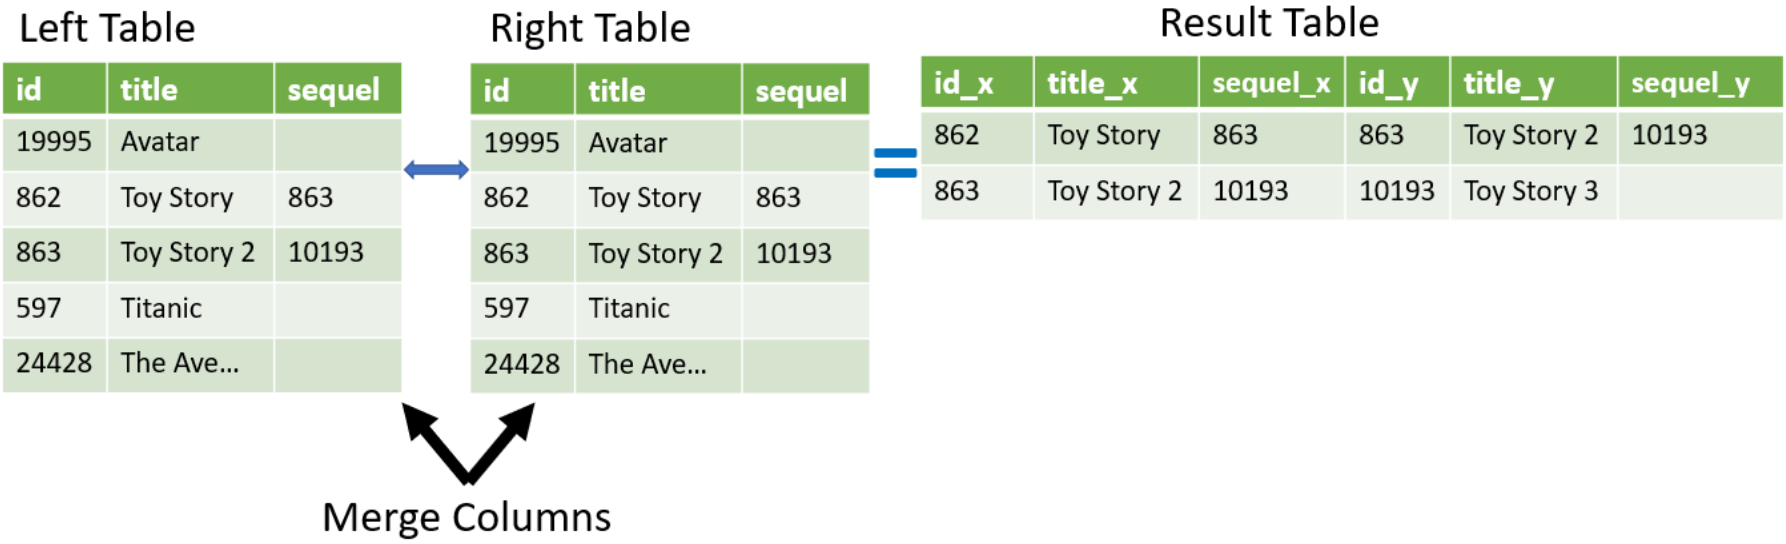

Aşağıdaki kod bloğunda, sequels tablosunu self join ile birleştirelim.

In [9]:
print(sequels.head(3))

ayrac()

original_sequels = sequels.merge(sequels, left_on = "sequel", right_on = "id", 
                                 suffixes = ("_org", "_seq"))
print(original_sequels.head(3))

      id        title  sequel
0  19995       Avatar    <NA>
1    862    Toy Story     863
2    863  Toy Story 2   10193

*****

   id_org                                  title_org  sequel_org  id_seq  \
0     862                                  Toy Story         863     863   
1     863                                Toy Story 2       10193   10193   
2     675  Harry Potter and the Order of the Phoenix         767     767   

                                title_seq  sequel_seq  
0                             Toy Story 2       10193  
1                             Toy Story 3        <NA>  
2  Harry Potter and the Half-Blood Prince        <NA>  


+ sequel sütunu NaN olmayan filmler, devam filmlerinin id'lerini barındıran filmlerdir. Yani sequel sütunu, title sütunundaki filmin, devam filminin id'sidir.


+ Devam filmlerinin kimliklerinin, orijinal filmlerin kimliğiyle eşleştiği satırları eşleştirmek için left_on ve right_on parametrelerini kullandık.